# Programming for Data Analysis Project

***

Project Brief:

*Create a data-set create a data set by simulating a real-world phenomenon of your choosing*

 - *Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*
 - *Investigate the types of variables involved, their likely distributions, and their relationships with each other.*
 - *Synthesise/simulate a data set as closely matching their properties as possible.*
 - *Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*
 
 ***

### Introduction

<br>

Within this jupyter notebook, I will simulate a dataset which represents the distribution of salaries across a population. 

Some key variables which influence the salary of an individual are age, gender, education, and industry. Of these variables, industry, education and gender are all categorical variables which will follow binomial or multinomial distributions. As age is continuous numerical data, further investigation will be needed to identify the distribution.

To begin, I will research these variables and their trends within the workforce, as well as how they may relate to one another. I will then investigate how these variables impact the annual salary of an individual.

Following this investigative work, I will conclude by using these results to simulate a data set which mimics the real-world analysis.

<br>

In [1]:
# for numerical arrays and distributions
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# creating dataframes
import pandas as pd
# another format of plotting
import seaborn as sns
#nice plot layout in notebook
%matplotlib inline
# defining the seed so my results don't vary on each execution
rng = np.random.default_rng(seed=0)
# ensure the full resulting dataframe is displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Variable 1: Gender

For the purpose of this investigation, I will consider male and female as the 2 possible genders within the workforce, as the proportion of non-binary individuals included within widely avaialable statistical data is negligible. As such, gender in the workforce is a binomial distribution.

According to 2019 data from the Central Statistics Office (CSO), women account for 45.9% of the workforce in ireland, and men make up the remaining 54.1% [1].

For this analysis, a "success" will correlate to Male, so I will set p=0.541.

In [2]:
# one trial for each execution
n=1
# probability of success
p=0.541
# repeat 1000 times
x=1000
gender = rng.binomial(n,p,x)

In [3]:
# calculate a count value to identify the male/female ratio in the data
# will be useful for other variables which depend on gender
count=0
for i in gender:
    if i==1:
        count += 1
# print result to screen for reference
print(count)

508


### Variable 2: Age

The 2019 data from the CSO also provides a breakdown of the male and female workforce distribution across age bands [1]. As seen in table 5.4 and figure 5.5, the distribution across age for both genders peaks in the 35-44 age group, and loosely follows a normal distribution. As such, I believe the distribution of age within the workforce is largely independent of a person's gender, and will be treated as such in this simulation.

Taking the median value of 40 as the mean, the remaining parameter to be considered is the standard deviation. Taking the empirical rule into consideration [2], and that the significant age range falls within +/- 25 of the mean, a standard deviation of 8 years best describes the spread of the data.



In [4]:
# setting mean, standard deviation, and size of output
loc = 40
scale = 8
size = 1000
# creating the distribution
age = rng.normal(loc,scale,size)
# converting the age values to integers
age = age.astype(int)

In [5]:
# initiating the dataframe 
df = pd.DataFrame({'gender':gender, 'age':age})

### Variable 3: Industry

Another variable which is likely to have an impact on an individuals salary is the industry in which they work. For the purpose of this similuation, I have selected 13 categories from the 2016 census data [3] which provides the number of individuals employed in each of the categories, broken down by gender.

The categories in scope are as follows:

 - Wholesale and retail trade;
 
 - Human health and social work;
 
 - Manufacturing;
 
 - Education;
 
 - Accommodation and food service;
 
 - Professional, scientific and technical;
 
 - Construction;
 
 - Financial and insurance;
 
 - Information and communication;
 
 - Agriculture, forestry and fishing;
 
 - Transportation and storage;
 
 - Administrative and support service;
 
 - Arts, entertainment and recreation.
 
The distribution of the workforce across these categories varies greatly between males and females, thus a different distribution will be needed for each gender. In both cases, a multinomial distribution is most appropriate to simulate this data, however the probabilities applied to each category will vary. Given the data used as my source represents the entire population, I will use this to identify the appropriate probabilities to assign to each category [3].

In [6]:
# adding categories to an array
categories = ['Wholesale and retail trade','Human health and social work','Manufacturing','Education',
              'Accommodation and food service','Professional, scientific and technical','Construction','Financial and insurance',
              'Information and communication','Agriculture, forestry and fishing','Transportation and storage',
              'Administrative and support service','Arts, entertainment and recreation']
# probabilities to be used for males
p_men = [0.1580,0.0527,0.1586,0.0490,0.0623,0.0684,0.1068,0.0486,0.0687,0.0888,0.0722,0.0447,0.0211]
# probabilities to be used for females
p_women = [0.1642,0.2295,0.0789,0.1730,0.0801,0.0686,0.0093,0.0620,0.0379,0.0136,0.0222,0.0408,0.0201]

In [7]:
# the count variable is the count of males in the first array created
# output will be count number of arrays with 13 elements each
# each array will have 12 zeros and 1 one, the index of the one will correspond to the industry in the categories array
industry_men = rng.multinomial(1,p_men,size=count)
# empty list which will be used to hold the categroy generate
intermediate_list = []
# loop through each event in the simulation
for i in industry_men:
    # look at each value in the output array for the specific event
    for j in range(len(i)):
        # if loop will run when the category selected has been identfied
        if i[j] == 1:
            # add the relevant category to the list
            intermediate_list.append(categories[j])

# convert the list to a dataframe, so it can be added to the overall dataframe
intermediate_dataframe = pd.DataFrame(intermediate_list,columns=['industry'])
# identifies the indices in the overall dataframe which corrspond to men
men_index = np.array(df.loc[df.gender==1].index)
# adds the column of these indices to the results for men
intermediate_dataframe['men_index'] = men_index
# sets this column as the index for this array, so it will match up to the correct values in the overall dataframe
intermediate_dataframe.set_index('men_index',inplace=True, drop=True)
# add column of results to overall dataframe
df.loc[df.gender==1,'industry'] = intermediate_dataframe

In [8]:
# here the size value is set to the total amount minus the values already set for men
# gender value also set to 0 instead of 1
# all other comments from the previous cell also apply here
industry_women = rng.multinomial(1,p_women,size=1000-count)
intermediate_list1 = []
for i in industry_women:
    for j in range(len(i)):
        if i[j] == 1:
            intermediate_list1.append(categories[j])

intermediate_dataframe1 = pd.DataFrame(intermediate_list1,columns=['industry'])
women_index = np.array(df.loc[df.gender==0].index)
intermediate_dataframe1['women_index'] = women_index
intermediate_dataframe1.set_index('women_index',inplace=True, drop=True)
df.loc[df.gender==0,'industry'] = intermediate_dataframe1

### Variable 4: Education

The education level of an individual is another variable which I believe will have an impact on their salary, with those who reach a higher level of qualification likely to earn a larger salary. Through inspection of the 2016 census data [4], it is clear from firgure 2.3 that the distribution of education levels has a significant level of variation between industries.

With regards to gender, when the following 4 grouping of education level are considered:

 - Primary;
 
 - Secondary;
  
 - Certificate/Apprenticeship;
 
 - Third Level +.
 
The distribution also varies between the two genders [5]. However, the variation which occurs here is likely an echo of the variation due to industry and how frequently industries occur in each gender. For example, health care and social work is the most popular industry for females, which has a very high proportion of third level educated individuals. In contrast, farming and agriculture have a much higher proportion of males than females, and this category has a much higher incidence of primary and secondary education. 

As such, I feel that to consider both gender and industry as significant variables in the distribution of education, when these to variables are in themselves interdependent, would excessively skew the proportions in the distribution. I will use the population data from table EA007 from the 2016 census to calculate the correct probabilities for each of the 4 education levels listed above for both males and females.

In [9]:
# array of education levels
ed_levels = ['Primary','Secondary','Certificate/Apprenticeship','Third Level +']
# probabilities for men
p_ed_men = [0.0634,0.3737,0.2422,0.3208]
# probabilities for women
p_ed_women = [0.0340,0.2901,0.2339,0.4419]

In [10]:
education_men = rng.multinomial(1,p_ed_men,size=count)
intermediate_list2 = []
for i in education_men:
    for j in range(len(i)):
        if i[j] == 1:
            intermediate_list2.append(ed_levels[j])

intermediate_dataframe2 = pd.DataFrame(intermediate_list2,columns=['education_level'])
men_index = np.array(df.loc[df.gender==1].index)
intermediate_dataframe2['men_index'] = men_index
intermediate_dataframe2.set_index('men_index',inplace=True, drop=True)
df.loc[df.gender==1,'education_level'] = intermediate_dataframe2

In [11]:
education_women = rng.multinomial(1,p_ed_women,size=1000-count)
intermediate_list3 = []
for i in education_women:
    for j in range(len(i)):
        if i[j] == 1:
            intermediate_list3.append(ed_levels[j])

intermediate_dataframe3 = pd.DataFrame(intermediate_list3,columns=['education_level'])
women_index = np.array(df.loc[df.gender==0].index)
intermediate_dataframe3['women_index'] = women_index
intermediate_dataframe3.set_index('women_index',inplace=True, drop=True)
df.loc[df.gender==0,'education_level'] = intermediate_dataframe3

### Final Variable: Salary

Now that the distributions for the four variables which I consider influential on an individuals salary have been simulated, the final requirement is to identify how exactly these variables will impact the salary figure.

I will research how the gender, age, industry and education level of an individual is likely to impact their salary to form a function which can be used to generate a salary estimate for a person for which these variables are known. 

As a base for this function, I will use the known minimum wage in Ireland [6] which accumulates to €20,483 per annum. The function to calculate the salary S of an individual will be:

$$\ S=20483+f(g,a,i,e)$$

where:

 - a = age of an individual;
 
 - g = gender, a binary variable of 1 for males and 0 for females;
 
 - i = industry, wherein the industries will be assigned an appropriate numerical value;
 
 - e = education, wherein the education level will be assigned an appropriate numerical value.
 
***

#### Impact of Gender

The latest data suggests that women earn 14.4% less on average than their male counterparts in Ireland [7]. As such, in order to correctly simulate the salary distribution the salaries for women will need a 0.856 multiplier to adjust their wages. Within the formula, this will appear as *(0.856 + 0.144g)* where g=1 for med, and g=0 for women.

The format of the equation can now be summarised as follows:

$$\ S = (20483)(0.856 + 0.144g) * f(a,i,e)$$

***

#### Impact of Industry

Table EHA05 from the 2016 census shows the mean annual salary across industries in Ireland [8]. The results show a significant difference between industries, with Accomodation and Food Service falling at the bottom of the scale, and Finance and Insurance having the highest mean.

The average annual salary in Accommodation and Food Service as per the census data is 26,249, which is 5,766 more than the minimum wage . At the other end of the spectrum, Finance and Insurance has an average salary which falls 38,269 more than the minimum wage, which is over 6 times more than the increase for Accommodation and Food Service.

To include the industry consideration in an individuals salary, I will add 5,766 to the equation, which will then be multiplied by the industry variable, which will be calculated by taking the difference between the industry average and the minimum wage, and dividing this by 5,766.

$$\ S = ((20483)(0.856 + 0.144g) + 5766i) * f(a,e) $$

***

In [12]:
# array of proportional increases above minimum wage for industry categories
# indices of this array correspong to the categories array previously created
categories_multiplier = [3.1823,3.9174,4.0137,5.8975,1,5.4388,3.6644,6.6370,6.2518,4.0317,3.9903,2.3215,2.6259]
for i in range(13):
    df.loc[df.industry==categories[i],'industry multiplier'] = categories_multiplier[i]

#### Impact of Education Level

Refering once again to the 2016 census data [9], the mean salary varies greatly depending on the highest level of education reached by the individual, as seen in Table 5.1. The smallest values in this table fall far below the national minimum wage annual salary, this is likely due to the fact that no adjustment has been made for the hours worked to earn the salaries in this table, as stated in the opening section of the source. 

As such, the impact of education on a salary cannot be calculated using the same method as Industry. Rather than using an addition operation to add the correct proportion to the salary, The education level will act as a direct multiplier to the equation which has been developed thus far.

For primary education, given the low levels recorded in the mean salary it is reasonable to believe that the corresponding adjustment for a full time annual salary would approximately equate to the minimum wage; This would correspond to a multiplier between 0.8 and 0.88 depending on the gender value used. For the purpose of this simulation I will use the average value of 0.84.

For secondary and higher cert education, the proportion increase from the primary education value gives 1.1066 and 1.4923 respectively; however for Third level education the mean salary varies from 32,193 for an ordinary bachelors degree (proportion of 1.7832) to 60,192 for a PhD (proportion of 3.3340). Rather than assigning an initial constant value for third level education, these will instead be assigned a random number from the normal distribution, with a mean of 2.5586 (the mid point of the range of proportions) and a standard deviation of 0.3, which should provide an output within the range of proportions as per the empirical rule [2].

The salary equation is now as follows:

$$\ S = ((20483)(0.856 + 0.144g) + 5766i) e * f(a) $$

***

In [13]:
# creating an array for the education level proportions, excluding third level
ed_multiplier = [0.84,1.1066,1.4923]
# for loop to add the appropriate multiplier to each education level
for i in range(3):
    df.loc[df.education_level==ed_levels[i],'education multiplier'] = ed_multiplier[i]

# this is the number of random numbers that will need to be generated
N = df.loc[df.education_level=="Third Level +",'gender'].count() 
# create a single column dataframe with the range of values for third level education
third_level_multiplier = pd.DataFrame(rng.normal(2.5586,0.3,size=N),columns=['education multiplier'])
# obtain the correct indices for third level individuals in the overall dataset
third_level_index = np.array(df.loc[df.education_level=='Third Level +'].index)
# add this index to the multiplier dataframe
third_level_multiplier['third_level_index'] = third_level_index
# now set the new column as the index for the dataframe
third_level_multiplier.set_index('third_level_index',inplace=True, drop=True)
# now when they are equated the values will correctly line up
df.loc[df.education_level=='Third Level +','education multiplier'] = third_level_multiplier

#### Impact of Age

The CSO performed analysis on mean weekly earnings based on administrative data (such as revenue) in 2018 [10] across a range of age bands. This data shows the 40-49 age group have the highest weekly earnings at €908.39, and the 15-24 age group have the lowest at €328.61. However, it is worth noting that this dataset includes both part time and full time employees, and it also includes bonuses and benefit in kind payments.

While it is difficult to accommodate for bonuses and similar add on payments, it is possible to take the part time employment into consideration. An annual minimum wage  of €20,483 equates to a weekly payment of €393.90. Therefore I shall take this number for the 15-24 age group, rather than the lower figure.

Given that, so far, all of the proportion multipliers used have been increasing the overall value, the age multiplier will be used to decrease the overall value by setting the 40-49 band as 1, and all other age bands a smaller decimal value based on the percentage differences from the mean weekly salaries.

The salary equation is now as follows:

$$\ S = ((20483)*(0.856 + 0.144*g) + 5766*i) * e * a $$

***

In [14]:
# a different proportion will be applied to each of the 6 age bands
df.loc[(df.age <= 24), 'age multiplier'] = 0.4336
df.loc[(df.age >= 25) & (df.age <= 29), 'age multiplier'] = 0.6631
df.loc[(df.age >= 30) & (df.age <= 39), 'age multiplier'] = 0.8615
df.loc[(df.age >= 40) & (df.age <= 49), 'age multiplier'] = 1
df.loc[(df.age >= 50) & (df.age <= 59), 'age multiplier'] = 0.9563
df.loc[(df.age >= 60), 'age multiplier'] = 0.7285

#### Real World Noise Multiplier

For the data generated thus far, the same values appear numerous times within each row; for example, the age multiplier category compiled in the cell above is six values repeated throughout the column. In reality, salaries would still show some variation for individuals who fall within all the same age, gender, industry and education categories. As such, in order to better simulate a real world dataset, I will further add a 'variance column, which will make a minor adjustment to the final salary figure, based on a random number from the normal distribution with mean 1 and standard deviation of 0.1.

The final salary equation is:

$$\ S = ((20483)*(0.856 + 0.144*g) + 5766*i) * e * a * v $$

***

In [15]:
df['variance'] = rng.normal(1,0.1,1000)

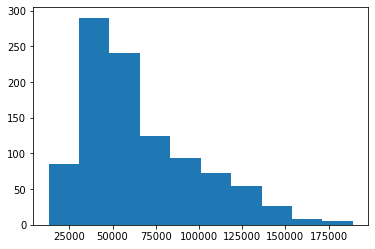

In [16]:
# creating variables which align with the equation formed
g = df['gender']
i = df['industry multiplier']
e = df['education multiplier']
a = df['age multiplier']
v = df['variance']

# calculate the salary column
df['salary(€)'] = round(((20483) * (0.856 + 0.144 * g) + 5766 * i) * e * a * df['variance'],2)

# plot a histogram of the results to better visualise the results
plt.hist(df['salary(€)'])
plt.show()

In [17]:
# print results to the screen
display(df)

,gender,age,industry,education_level,industry multiplier,education multiplier,age multiplier,variance,salary(€)
0,0,40,Wholesale and retail trade,Secondary,3.1823,1.106600,1.0000,0.990346,39324.33
1,1,47,Manufacturing,Third Level +,4.0137,2.685240,1.0000,0.929636,108903.44
2,1,57,Manufacturing,Secondary,4.0137,1.106600,0.9563,0.937288,43271.63
3,1,45,Education,Third Level +,5.8975,2.723417,1.0000,0.756745,112296.00
4,0,28,Human health and social work,Third Level +,3.9174,2.651366,0.6631,1.097110,77387.80
5,0,18,Financial and insurance,Secondary,6.6370,1.106600,0.4336,1.003178,26860.30
6,0,39,Administrative and support service,Secondary,2.3215,1.106600,0.8615,1.036662,30557.05
7,0,40,Human health and social work,Certificate/Apprenticeship,3.9174,1.492300,1.0000,1.010424,60496.93
8,0,30,Human health and social work,Third Level +,3.9174,2.231838,0.8615,0.929730,71721.35
9,0,42,Wholesale and retail trade,Secondary,3.1823,1.106600,1.0000,1.127202,44758.58


In [18]:
# show mean, min, max, etc.
df['salary(€)'].describe()

count      1000.000000
mean      65647.843880
std       33420.704608
min       12919.960000
25%       40733.535000
50%       55488.615000
75%       84834.385000
max      189080.540000
Name: salary(€), dtype: float64

In [19]:
df['salary(€)'].median()

55488.615000000005

## Analysis of Results Against Known Salary Trends

<br>

Based on analysis performed by the CSO in 2018, the mean annual salary in Ireland was €44,180. This figure is much lower than the average salary of €65,647 in the simulated dataset.

There are a number of factors which may contribute to the simulated dataset providing a higher average than the CSO figure:

 - As previously noted when analysing the impact of age, a lot of the data does not differentiate between basic salary and any bonus compensation or benefit in kind. As I could not account for this in the simulation, this has likely resulted in a higher than expected result overall.
 
 - The mean annual salary calculation performed by the CSO was not solely based on full time employees as the simulated dataset is.
 
As seen in the histogram, the shape of the distribution is as expected; a sharp rise to the average value, and the frequency tailing off slower to low occurences for much larger salary amounts.

***

##### References:

[1] Women and Men in Ireland 2019; CSO; https://www.cso.ie/en/releasesandpublications/ep/p-wamii/womenandmeninireland2019/work/

[2] Empirical Rule; Adam Hayes; https://www.investopedia.com/terms/e/empirical-rule.asp

[3] Census 2016 Table EB030; CSO; https://data.cso.ie/table/EB030

[4] Census 2016 Education and Economic Status; CSO; https://www.cso.ie/en/releasesandpublications/ep/p-cp10esil/p10esil/ees/

[5] Census 2016 Table EA007; CSO; https://data.cso.ie/table/EA007

[6] Ireland National Minimum wage; Country Economy; https://countryeconomy.com/national-minimum-wage/ireland

[7] The gender pay gap - Why are women still earning less than men?; Ingrid Miley; https://www.rte.ie/news/business/2020/1109/1177032-gender-pay-gap/

[8] Census 2016 Table EHA05; CSO; https://data.cso.ie/table/EHA05

[9] Geographical Profiles of Income in Ireland 2016; CSO; https://www.cso.ie/en/releasesandpublications/ep/p-gpii/geographicalprofilesofincomeinireland2016/education/

[10] Earnings Analysis using Administrative Data Sources 2018; CSO; https://www.cso.ie/en/releasesandpublications/ep/p-eaads/earningsanalysisusingadministrativedatasources2018/age/

[11] Earnings Analysis using Administrative Data Sources 2018; CSO; https://www.cso.ie/en/releasesandpublications/ep/p-eaads/earningsanalysisusingadministrativedatasources2018/annualearnings/

***

# End

***